### Assignment #3: Supervised Machine Learning

First we import required modules and load the data from the .json file to a Pandas DataFrame. We inspect the DataFrame object to determine its properties. 

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
data = pd.read_json("Assignment_03/reviews.json") # Data import 
data['date'] = data['date'].apply(lambda x: datetime.fromordinal(x)) # Date conversion
data.head(4)

,author,body,date,helpful,stars,style,title
0,Gene H.,We were looking for a decent flashlight for ou...,2018-04-11,0,5,LED Flashlight 2P,Great range for a small package
1,Cwazy Wabbit,"Very nice, works great",2018-04-11,0,5,LED Flashlight 2P,Five Stars
10,David C. Bradford,Sturdy little lights that work every time as a...,2018-04-10,0,5,LED Flashlight 2P,Sturdy little lights that work every time as
100,MDD,I bought 2 and they worked great for 2-3 weeks...,2018-03-09,0,1,LED Flashlight 2P,I bought 2 and they worked great for 2-3 weeks...


The dataframe is of the shape `(833, 7)` and its axes are: `['author', 'body', 'date', 'helpful', 'stars', 'style', 'title']`.
Lets now try to create a simple bag-of-words binary-classification model for the data. 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
body_list = data['body'].tolist()
rating_list = data['stars'].tolist()
x_train, x_test, y_train, y_test = train_test_split(body_list, rating_list, test_size=0.2, random_state=1)
vectorizer = CountVectorizer(lowercase=True, strip_accents='ascii', stop_words='english', min_df=0.01, max_df=0.9, binary=True)
vectorizer = vectorizer.fit(x_train)
x_train = vectorizer.transform(x_train) #just do .toarray() here?
x_test = vectorizer.transform(x_test)
total_word_counts = [sum(word_count) for word_count in zip(*x_train.toarray())]
word_frequencies = dict(zip(vectorizer.get_feature_names(), total_word_counts))
most_frequent_term = max(word_frequencies, key = word_frequencies.get)
print("The most frequent term is '" + most_frequent_term + "' and it occurs " + str(word_frequencies[most_frequent_term]) + " times in the training corpus.")

The most frequent term is 'bright' and it occurs 218 times in the training corpus.


Overall, we can say that the L1 regression was superior to the L2 regression in terms of accuracy and number of variables used. Confusion matrixes for these were very similar and uninteresting. I did not include them for aesthetic reasons. 

Now we shall attempt to plot some data points, despite rampant issues with python plotting in Pycharm and within iPython Notebooks.

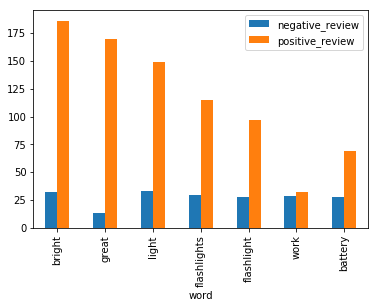

In [11]:
# import plotly.plotly as py
# import cufflinks as cf
# from plotly.graph_objs import *
top_indexes = [i for i, x in enumerate(y_train) if x>=4]
bot_indexes = [i for i, x in enumerate(y_train) if x<4]
top_reviews = x_train.toarray()[top_indexes]
bot_reviews = x_train.toarray()[bot_indexes]
top_word_counts = [sum(word_count) for word_count in zip(*top_reviews)]
bot_word_counts = [sum(word_count) for word_count in zip(*bot_reviews)]
top_bot_word_counts = pd.DataFrame({"word": vectorizer.get_feature_names(), "positive_review": top_word_counts, "negative_review": bot_word_counts})
import matplotlib.pyplot as plt
top_bot_most = top_bot_word_counts.sort_values('positive_review')[-5:][::-1].append(top_bot_word_counts.sort_values('negative_review')[-5:][::-1]).set_index('word')
top_bot_most.drop_duplicates().plot.bar()
# a = top_bot_word_counts.sort_values('top', ascending=False)[:5].set_index('word')
# b = top_bot_word_counts.sort_values('bot', ascending=False)[:5].set_index('word')
# a.append(b).drop_duplicates().plot.bar()
# top_bot_word_counts.sort_values('top', ascending=False)[:5].iplot(kind='bar', filename='cufflinks/grouped-bar-chart') #'jupyter/styled_bar'
# top_bot_word_counts.sort_values('top', ascending=False)[:5].iplot(kind='bar', filename='jupyter/styled_bar') 

Now we apply several different simple regressions and evaluate their properties.

In [12]:
from sklearn.linear_model import LogisticRegression
binary_train = [1 if x >=4 else 0 for x in y_train]
binary_test = [1 if x >=4 else 0 for x in y_test]
lr1 = LogisticRegression(penalty='l1')
lr2 = LogisticRegression(penalty='l2')
lr1.fit(x_train, binary_train); lr2.fit(x_train, binary_train)
words_used1 = len(lr1.coef_[0]) - lr1.coef_[0].tolist().count(0)
words_used2 = len(lr2.coef_[0]) - lr2.coef_[0].tolist().count(0)
print(str(words_used1)+' words used in the L1 regression w/ accuracy: '+
      str(round(100 * lr1.score(x_test, binary_test), 2))+'%, '+
      str(words_used2)+' words used in the L2 regression w/ accuracy: '+
      str(round(100 * lr2.score(x_test, binary_test), 2)))

84 words used in the L1 regression w/ accuracy: 84.43%, 227 words used in the L2 regression w/ accuracy: 83.83


Overall, we can say that the L1 regression was superior to the L2 regression in terms of accuracy and number of variables used. (As a note though, training accuracy was higher for both regressions, of course, with the L2 having a slight advantage, but due to the difference in words used, the signifigance wasn't great enough to counteract that IMHO) Confusion matrixes for these were very similar and uninteresting. I did not include them for aesthetic reasons. 

Now we can try for a more robust estimator. To do this, I wanted to transform more data from the scraping into numeric variables to imput into my new model. For the style of the item reviewed, I encoded the labels as integers. For the author variable, there were a number of things I could have done with this, but I decided to check if the author was logged in or was reviewing as an anonymous 'Amazon Customer', this was stored as a binary variable. I was going to incorporate the title into the model as an input variable, however, I first checked if there were any blantant givaways and as it turns out, nearly 1/3rd of the titles explicitly mentioned the number of stars the review had. I therefore combined the title and body of the review before vectorizing it. 

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['style'])
data['style'] = le.transform(data['style'])
data['author'] = [1 if x=='Amazon Customer' else 0 for x in data['author']]
round(100*sum([1 if 'stars' in x.lower() else 0 for x in data['title']])/len(data['title']),2)

29.77

In [14]:
data['text'] = pd.Series(data['title'] + " " + data['body'])
data = data.drop(columns=['title', 'body'])
data['date'] = data['date'].apply(datetime.toordinal)
data['date'] = data['date'] - min(data['date'])
data['date'] = data['date'] / max(data['date'])
from autocorrect import spell
import re
raw_texts = data['text'].tolist()
def process_text(review_text):
    digits = sum(1 for let in review_text if let.isdigit())
    no_contractions = re.sub("[']+", "", review_text)
    clean_text = re.sub("[!\"#$%&()*+,\-./:;<=>?@[\]^_`\\{|}~]|(\n)|[0-9]+", ' ', no_contractions)
    new_text = list(map(spell, clean_text.split()))
    differences = sum([1 for a, b in zip(new_text, clean_text.split()) if a != b])
    return ' '.join(new_text), digits, differences
texts, numbers, typos = zip(*list(map(process_text, raw_texts)))
print(str(sum(typos))+' typos in '+str(len(typos))+' reviews.')

181 typos in 833 reviews.


Suprizingly low number of typos.

In [15]:
data['numbers'] = pd.Series(numbers)
data['typos'] = pd.Series(typos)
stars = data['stars']
data = data.drop(columns=['text', 'stars'])
from sklearn.feature_extraction.text import TfidfVectorizer
word_list = list(map(str.split, texts))
from nltk.stem.snowball import EnglishStemmer # Also turns the text lowercase
stemmer = EnglishStemmer(ignore_stopwords=True) #ignore_stopwords=False
stemmed_word_list = list(map(lambda x: [stemmer.stem(w) for w in x], word_list))
stemmed_list = list(map(lambda x: ' '.join(x), stemmed_word_list))
tfidf = TfidfVectorizer(lowercase=True, stop_words='english', norm=None, use_idf=False, max_df=0.99, min_df=2)
texts1, texts2, data1, data2, stars1, stars2 = train_test_split(stemmed_list, data, stars, test_size=0.15, random_state=1)
tfidf.fit(texts1)
tf1 = tfidf.transform(texts1)
tf2 = tfidf.transform(texts2)
tf1 = pd.DataFrame(tf1.toarray(), index=data1.axes[0])
tf2 = pd.DataFrame(tf2.toarray(), index=data2.axes[0])
data_in1 = pd.concat([data1, tf1], axis=1)
data_in2 = pd.concat([data2, tf2], axis=1)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(data_in1, stars1)
signifigant_features = data_in1.dtypes.index[[i for i, j in enumerate(lasso.coef_) if j != 0]]
sig_words = [tfidf.get_feature_names()[i] for i in signifigant_features[2:]]
print(', '.join(signifigant_features[:2])+' | '+', '.join(sig_words))

helpful, numbers | bright, great, small, work


Since Lasso only gives us 6 indicator variables (with an Lambda or "alpha" of 0.1, with the default value of 1 we get 0 indicator variables. We can see that the model selected 4 of the word vectors and also the number of people that found the review helpful, and the number of numbers in the reviews text or title. The accuracy of the Lasso regression was embarrasingly low and so was not included here.

In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(data1, stars1)
def per(x): return(str(round(100*x,2))+'%')
print(per(mlp.score(data1, stars1))+' training accuracy, '+per(mlp.score(data2, stars2))+' testing accuracy')

66.95% training accuracy, 66.4% testing accuracy


C:\Users\Alec\Anaconda3\envs\main\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Not bad for using the default classifier. Also, after doing this I realized I did it without incorporating any word vectors, just using the other extracted and developed featues. IMHO this accuracy is therefore even more commendable. Accuracy is expected to go down from the binary classifier because 5 classes are much harder to classify than just two. In fact the problem is exacerbated by the unbalanced nature of the dataset. Before we dive into that, lets attempt to make the model using the word vectors and see how that turns out.  

In [18]:
mlp = MLPClassifier() #
mlp.fit(data_in1, stars1) #data1 whoops was using this
print(per(mlp.score(data_in1, stars1))+' training accuracy, '+per(mlp.score(data_in2, stars2))+' testing accuracy')

99.01% training accuracy, 71.2% testing accuracy


C:\Users\Alec\Anaconda3\envs\main\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Oh my goodness, the difference in training accuracy is staggering (but, on the other hand, so is the sheer number of predictive variables we added). Despite the size of the MLP being the same throughout both (aside from the input layer), which in some sense acts as a bottleneck to overfitting, the nature of neural networks means that this is still a possible issue. If I wanted to dive further into the tradoff between input variables and accuracy I could use Cohens Kappa or something but for now, lets examine the unbalanced nature of the dataset some more. 

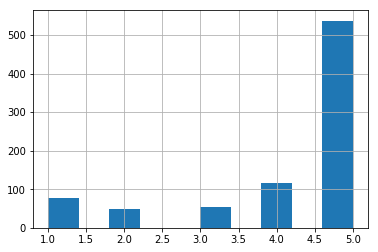

In [17]:
# sum([1 if x==5 else 0 for x in stars])/ len(stars) #64.47% of the reviews are 5 star reviews
stars.hist()

Ok well that is... terrifying. Lets first try some Lets try some oversampling shall we? Since we're using a neural network, a naive oversampling would simply increase the number of batches in the training and the representation of those exact undersampled classes, I don't think a priori that it would be as helpful for this problem as it would in say... a convolutional net. I think due to the fluid nature of the text vector imputs, it would be more helpful to use a oversampling strategy that interpolates the dataset, for this purpose I chose SMOTE. 

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
new_data_in1, new_stars1 = sm.fit_sample(data_in1, stars1)
# (len(new_data_in1)-len(data_in1))/len(data_in1) #2.199
mlp = MLPClassifier() 
mlp.fit(new_data_in1, new_stars1) #well its taking quite a bit longer now lol
print(per(mlp.score(new_data_in1, new_stars1))+' training accuracy, '+per(mlp.score(data_in2, stars2))+' testing accuracy')

99.82% training accuracy, 64.8% testing accuracy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001720982C2E8>]], dtype=object)

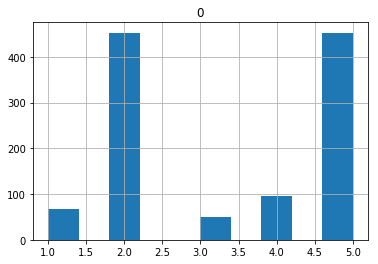

In [23]:
pd.DataFrame(new_stars1).hist()

Oh dear. Training accuracy went from 99.0% to 99.8% despite the increase in the size of our training data by 220% (which, on first impression, seems like it might make it harder to get a good training accuracy). Testing accuracy however, fell from 71.2% to 64.8%. Sad day.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000172098AAFD0>]], dtype=object)

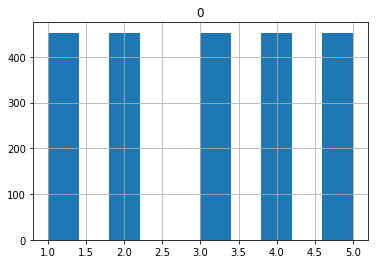

In [30]:
from imblearn.over_sampling import RandomOverSampler
naive = RandomOverSampler(random_state=1, ratio="minority")
new_data_in1, new_stars1 = naive.fit_sample(data_in1, stars1)
new_data_in1, new_stars1 = naive.fit_sample(new_data_in1, new_stars1) #second 
new_data_in1, new_stars1 = naive.fit_sample(new_data_in1, new_stars1) #third 
new_data_in1, new_stars1 = naive.fit_sample(new_data_in1, new_stars1) #fourth 
pd.DataFrame(new_stars1).hist()

In [31]:
mlp = MLPClassifier() #takes a while, ugh
mlp.fit(new_data_in1, new_stars1)
print(per(mlp.score(new_data_in1, new_stars1))+' training accuracy, '+per(mlp.score(data_in2, stars2))+' testing accuracy')
(len(new_data_in1)-len(data_in1))/len(data_in1)

99.82% training accuracy, 67.2% testing accuracy


2.1991525423728815

Ok so everything improved, but lets try that same 4x resampling with SMOTE instead of with the naive. 

In [34]:
sm = SMOTE(k_neighbors=10, m_neighbors=20, random_state=42)
new_data_in1, new_stars1 = sm.fit_sample(data_in1, stars1)
new_data_in1, new_stars1 = sm.fit_sample(new_data_in1, new_stars1) #second
new_data_in1, new_stars1 = sm.fit_sample(new_data_in1, new_stars1) #third
new_data_in1, new_stars1 = sm.fit_sample(new_data_in1, new_stars1) #fourth
mlp = MLPClassifier(random_state=42) #
mlp.fit(new_data_in1, new_stars1) #well its taking quite a bit longer now lol
print(per(mlp.score(new_data_in1, new_stars1))+' training accuracy, '+per(mlp.score(data_in2, stars2))+' testing accuracy') #99.78%  69.6%
print((len(new_data_in1)-len(data_in1))/len(data_in1))

99.78% training accuracy, 68.0% testing accuracy
2.1991525423728815


Well, now lets try changing the MLP network. Scikit-learn's function documentation reccomends using the 'lbfgs' solver instead of ADAM for small datasets so lets see how that turns out. 

In [36]:
mlp = MLPClassifier(solver='lbfgs', random_state=42) #'lbfgs' reccomended by scikit-learn for small datasets
mlp.fit(new_data_in1, new_stars1) 
print(per(mlp.score(new_data_in1, new_stars1))+' training accuracy, '+per(mlp.score(data_in2, stars2))+' testing accuracy')
# print((len(new_data_in1)-len(data_in1))/len(data_in1)) #i'll stop with this now 

99.87% training accuracy, 66.4% testing accuracy


Ok that turned out poor. I also tried non-reccomended/non-default stochastic gradient descent as a solver, but that didnt show any improvement. I tried changing the activation function from ReLU (no reason that would help, but why not) and all the options lead to a decrease in performance. Suprizingly, using linear neurons did not decrease training or test accuracy substantially, which means this problem could likely be solved sufficiently by a large generalized linear model. I did try to do multi-class classification using LASSO regressions and that failed miserably and I don't have much hope for other purely linear models as a result though. I am suprized that Scikit-learn doesn't offer more choices for gradient descent, I mean... 3 choices, really? Most people in the field would likely be able to name at least three times as many from memory. Their selection of activation functions is sufficient, though they don't offer leaky-ReLU or softplus which is a shame, and they waste space on both logistic and tanh which doesn't make much sense as they're to some extent affine transforms of each other. Oh sure there's efficiency advantages and gradient biases and all that, but those are luxuries that can be worried about after we've been given access to leaky-ReLU! 

I then tried increasing and decreasing the default learning rate by various settings, none of them improved upon the default ADAM learning rate. Seing as we were using ADAM, I tried changing the values of Beta 1 and 2 both increasing and decreasing them. As always, the defaults worked best. I didn't touch epsilon because I'm no fool. 

I am suprized at the lack of options for this solver. Some options for momentum and nesterov in SGD but no batch size, no advanced activation functions, no fancy gradient descent algorithms. For shame Scikit-learn! I knew I should've used Keras for this!

But I digress, let's move on and try something else. Based on the fact that the training accuracy improved when we added the term frequency vectors, but the test accuracy fell, I think its clear that this model is overfitting. To counteract this I could change my model or... I could just raise the error tolerance for the solver. Yeah lets try that. 

In [38]:
mlp = MLPClassifier(tol=0.0002, random_state=42)
mlp.fit(new_data_in1, new_stars1)
print(per(mlp.score(new_data_in1, new_stars1))+' training accuracy, '+per(mlp.score(data_in2, stars2))+' testing accuracy')

99.6% training accuracy, 66.4% testing accuracy


Idk what's happening, the test accuracy went up to 70.4% in my .py workbook and yet in the iPython notebook it fell. Random states are the same, everything is the same. *sigh* this is why I don't use notebooks. Lets just change the neuron layout and be done with it. Some Netherlands research institute's paper suggested a single hidden layer with 25 nodes. 

In [42]:
mlp = MLPClassifier(hidden_layer_sizes=(25), tol=0.0002, random_state=42)
mlp.fit(new_data_in1, new_stars1)
print(per(mlp.score(new_data_in1, new_stars1))+' training accuracy, '+per(mlp.score(data_in2, stars2))+' testing accuracy')

99.43% training accuracy, 64.0% testing accuracy


Well that's a shame. Lemme try something wider but deeper. 

In [44]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), tol=0.0002, random_state=42)
mlp.fit(new_data_in1, new_stars1)
print(per(mlp.score(new_data_in1, new_stars1))+' training accuracy, '+per(mlp.score(data_in2, stars2))+' testing accuracy')

99.78% training accuracy, 71.2% testing accuracy


Ok that's better I guess. Now lets see how far we can push it. (Apparently not very far. I tried a few basic hidden neuron configurations and I couldn't get to a higher accuracy) SO I guess that's the final model. I tried many different configurations for hidden layers as well as for other hyper parameters for the model. I didn't put them all in here because, lets face it, this document is boring enough as it is. Some of them are in the attached assignment_03_workbook.py file but most of the noninteresting/counterproductive tests were deleted completely. 

If I were to do this again, I'd probably use Keras and Tenserflow and try a few other configurations other then the multilayer perceptron multi-class classifier. Using a nonlinear (or even linear, by the looks of it) SVM. Possibly a decision tree to be naieve or naieve bayes to be really naieve, also maybe a random forest. I'd also very much like to see the outcome just using k-nearest neighbors. Could probably use word2vec and spend some time scaling certain word vectors and aggregating them in novel ways. Oh well. 

And so there we have it. Sorry for the lack of images but matplotlib doesn't agree with my setup and it's hard for me to code blindly. If you want to know why the random state was 42? Memes. Please ignore any of the ConvergenceWarnings that delightfully added details of the filepath to GitHub. Does make sense as to why it hadn't conveged yet though, I mean, it was trying to fit it with not even the word frequency info. I'm certain that using a regression of just these variables wouldn't get you an R^2 close to what it would have to be to match the error tolerance, so it's a given that it would run out of iterations. In the future I could also look at various other iteration limits for those examples specifically. Perhaps a solver could be used to find the point at which training accuracy and test accuracy starts to diverge, a good oppertunity for a graph showing the divergence of overfitting in a real scenario. 

99.87% training accuracy, 65.6% testing accuracy


I pledge my honor that I have abided by the Stevens Honor System - Alec K

And so there we have it. Sorry for the lack of images but matplotlib doesn't agree with my setup and it's hard for me to code blindly. If you want to know why the random state was 42? Memes. 

And so there we have it. Sorry for the lack of images but matplotlib doesn't agree with my setup and it's hard for me to code blindly. If you want to know why the random state was 42? Memes. 